# analyse data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
def plot_reward(data: pd.DataFrame) -> None:
	rolling_means = []
	for index, row in data[['rewards', 'sr']].iterrows():
		rew = row['rewards']
		rolling_mean = pd.Series(rew).rolling(window=3).mean()
		rolling_means.append(rolling_mean)
		sr = row['sr']
		plt.plot(rew, alpha=0.7)
	all_rolling_means = pd.concat(rolling_means, axis=1).mean(axis=1)
	overall_rolling_mean = all_rolling_means.rolling(window=3).mean()
	plt.plot(overall_rolling_mean, color='red', label='Rolling Means', linewidth=2)
	plt.legend()
	plt.ylabel('normalized cumulative reward')
	plt.xlabel('episodes')
	plt.title('CartPole')
	# plt.suptitle('Comparison of learning converge speeds')
	plt.show()

# Cartpole best func

In [51]:
legacy = pd.read_csv('cartPole_legacy_rew.csv', delimiter=';')
legacy['rewards'] = legacy['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))
print(legacy.head())

best = pd.read_csv('cartPole_best_rew.csv', delimiter=';')
best['rewards'] = best['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))
best

                                             rewards  mean_reward  std_reward  \
0  [0.01015683, 0.01305878, 0.0174117, 0.00870585...     0.042611    0.048308   
1  [0.00816916, 0.00879756, 0.01382473, 0.0144531...     0.039069    0.053656   
2  [0.00832547, 0.02844537, 0.00832547, 0.0208136...     0.038954    0.049348   
3  [0.0267863, 0.0168193, 0.00747525, 0.01370462,...     0.038092    0.053127   
4  [0.00836106, 0.01741887, 0.01323834, 0.0111480...     0.039195    0.049156   

   pole_angle_diff  pole_position_diff    sr  
0         0.065600            0.256212  0.73  
1         0.063388            0.292790  0.34  
2         0.062529            0.250124  0.39  
3         0.065758            0.267820  0.80  
4         0.065886            0.249209  0.43  


,rewards,mean_reward,std_reward,pole_angle_diff,pole_position_diff,sr
0,"[-0.00398788831, -0.00151690493, 0.00525494056...",0.028179,0.058375,0.064500,0.322487,0.98
1,"[-0.00436615935, -0.00441467699, 0.00160520394...",0.030622,0.058235,0.063347,0.347238,0.47
2,"[-0.00396054503, 0.0125202337, -0.00491716812,...",0.027755,0.059342,0.060623,0.336597,0.99
3,"[0.0193862273, 0.00597087527, -0.00529446093, ...",0.031428,0.056229,0.065719,0.306786,0.74
4,"[-0.00502244701, 0.00279493504, -9.81511436e-0...",0.026350,0.057635,0.063536,0.282723,0.92
5,"[-0.00227877427, 0.00198964516, 0.000857903217...",0.026444,0.060247,0.062356,0.295741,0.89
6,"[0.0165253102, 0.00401247804, -0.00229317166, ...",0.028105,0.057813,0.060498,0.303092,0.99
7,"[-0.0041662491, -0.0019870303, -0.00583655228,...",0.024777,0.058747,0.060678,0.254821,0.98
8,"[-0.00330427835, 0.00396726825, -0.00179040005...",0.024933,0.058681,0.059932,0.333388,0.97
9,"[0.00291527824, -0.0056824516, -0.00738702711,...",0.029828,0.055485,0.063800,0.298855,0.60


In [52]:
legacy.describe()

,mean_reward,std_reward,pole_angle_diff,pole_position_diff,sr
count,10.000000,10.000000,10.000000,10.000000,10.00000
mean,0.039134,0.050702,0.064587,0.281202,0.58700
std,0.001672,0.001993,0.001275,0.023218,0.23847
min,0.036997,0.048308,0.062529,0.249209,0.23000
25%,0.038158,0.049204,0.063431,0.259114,0.40000
50%,0.039011,0.049692,0.065103,0.291386,0.59500
75%,0.039412,0.052602,0.065706,0.295155,0.77500
max,0.042611,0.053656,0.065886,0.311864,0.97000


In [53]:
best.describe()

,mean_reward,std_reward,pole_angle_diff,pole_position_diff,sr
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.027842,0.058079,0.062499,0.308173,0.853000
std,0.002279,0.001400,0.001981,0.027765,0.186431
min,0.024777,0.055485,0.059932,0.254821,0.470000
25%,0.026373,0.057679,0.060637,0.296519,0.777500
50%,0.027930,0.058305,0.062852,0.304939,0.945000
75%,0.029415,0.058730,0.063734,0.330663,0.980000
max,0.031428,0.060247,0.065719,0.347238,0.990000


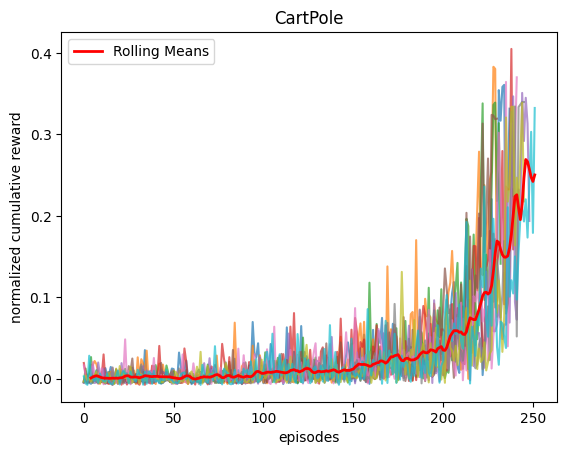

In [76]:
plot_reward(best)

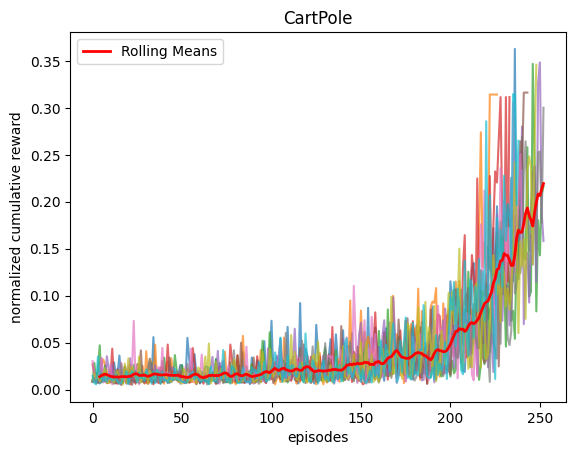

In [77]:
plot_reward(legacy)

# Cartpole

In [11]:
data = pd.read_csv('CartPole_v1_log.csv', delimiter=';')
data['rewards'] = data['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))
#data = data.where(data['sr']>0.90).dropna()
data.where(data['llm'] == 'qwen2.5-coder_llama3.2-vision')
data

,path,env,llm,llm_param,algo,algo_param,total_timesteps,reward_function,rewards,mean_reward,std_reward,sr
0,data/model/CartPole-v1_56776_1.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 56776},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.0013466388, 0.006040589, 0.0059295106, 0.00...",0.030907,0.036511,0.73
1,data/model/CartPole-v1_56776_2.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 56776},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.0013466388, 0.006040589, 0.0059295106, 0.00...",0.030907,0.036511,0.73
2,data/model/CartPole-v1_175710_1.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 175710},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.00426373, 0.005035245, 0.011928752, 0.01813...",0.030089,0.046499,1.00
3,data/model/CartPole-v1_175710_2.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 175710},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.00426373, 0.005035245, 0.011928752, 0.01813...",0.030089,0.046499,1.00
4,data/model/CartPole-v1_867808_1.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 867808},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.00983197, 0.021463675, 0.003928835, 0.00234...",0.032096,0.043715,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...
95,data/model/CartPole-v1_365666_2.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 365666},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.006858737, 0.00078279676, 0.0024521227, 0.0...",0.031481,0.047054,1.00
96,data/model/CartPole-v1_610988_1.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 610988},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.0030825841, 0.008896213, 0.0022266477, 0.00...",0.029146,0.047805,1.00
97,data/model/CartPole-v1_610988_2.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 610988},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.0034331265, 0.009535602, 0.0025809805, 0.00...",0.029250,0.047031,1.00
98,data/model/CartPole-v1_401884_1.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 401884},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[-0.016892578, -0.017205993, -0.014144864, -0....",0.012780,0.051902,0.04


In [12]:
data_img = pd.read_csv('CartPole_v1_log_img.csv', delimiter=';')
data_img['rewards'] = data_img['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))
#data_img = data_img.where(data_img['sr']>0.90).dropna()
data_img.where(data_img['llm'] == 'qwen2.5-coder_llama3.2-vision')
data_img

,path,env,llm,llm_param,algo,algo_param,total_timesteps,reward_function,rewards,mean_reward,std_reward,sr
0,data/model/CartPole-v1_56776_1.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 56776},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.0013466388, 0.006040589, 0.0059295106, 0.00...",0.030907,0.036511,0.73
1,data/model/CartPole-v1_56776_2.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 56776},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.0013466388, 0.006040589, 0.0059295106, 0.00...",0.030907,0.036511,0.73
2,data/model/CartPole-v1_175710_1.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 175710},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.00426373, 0.005035245, 0.011928752, 0.01813...",0.030089,0.046499,1.00
3,data/model/CartPole-v1_175710_2.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 175710},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.00426373, 0.005035245, 0.011928752, 0.01813...",0.030089,0.046499,1.00
4,data/model/CartPole-v1_867808_1.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 867808},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.00983197, 0.021463675, 0.003928835, 0.00234...",0.032096,0.043715,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...
95,data/model/CartPole-v1_645410_2.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 645410},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.00797308, 0.00990515, 0.011829001, 0.001321...",0.027737,0.046789,1.00
96,data/model/CartPole-v1_903298_1.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 903298},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.0066479575, 0.0049425503, 0.0062959976, 0.0...",0.031442,0.039200,0.07
97,data/model/CartPole-v1_903298_2.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 903298},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.0065211104, 0.004849773, 0.0061692004, 0.00...",0.030542,0.039588,0.18
98,data/model/CartPole-v1_670967_1.pth,CartPole-v1,qwen2.5-coder_llama3.2-vision,{'seed': 670967},PPO,"{'policy': 'MlpPolicy', 'verbose': 0, 'device'...",30000,"def reward_func(observations:np.ndarray, is_su...","[0.0017160082, 0.0027430959, 0.0051479004, 0.0...",0.029649,0.046184,0.97


In [15]:
print('data std rw',data['std_reward'].describe())
print('data_img std rw',data_img['std_reward'].describe())
print()

print('data mean rw',data['mean_reward'].describe())
print('data_img mean rw',data_img['mean_reward'].describe())
print()

print('data sr',data['sr'].describe())
print('data_img sr',data_img['sr'].describe())

data std rw count    100.000000
mean       0.035848
std        0.016797
min        0.003631
25%        0.023814
50%        0.044987
75%        0.047723
max        0.052529
Name: std_reward, dtype: float64
data_img std rw count    100.000000
mean       0.036395
std        0.014872
min        0.001545
25%        0.032525
50%        0.042912
75%        0.047072
max        0.051213
Name: std_reward, dtype: float64

data mean rw count    100.000000
mean       0.009416
std        0.027375
min       -0.050474
25%       -0.017714
50%        0.027657
75%        0.030107
max        0.034805
Name: mean_reward, dtype: float64
data_img mean rw count    100.000000
mean       0.013018
std        0.024692
min       -0.048952
25%       -0.014831
50%        0.027390
75%        0.030935
max        0.034601
Name: mean_reward, dtype: float64

data sr count    100.000000
mean       0.519600
std        0.459842
min        0.000000
25%        0.000000
50%        0.625000
75%        1.000000
max        1.00000

# Lunar Lander

In [5]:
data = pd.read_csv('LunarLander_v3_log.csv', delimiter=';')
data['rewards'] = data['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))
data = data.where(data['SR']>0.2).dropna()
data

AttributeError: 'float' object has no attribute 'split'

In [ ]:
plot_reward(data)

In [ ]:
data.loc[37]

In [ ]:
print(data.loc[37].reward_function)

# Hopper

In [4]:
data = pd.read_csv('Hopper_v5_log.csv', delimiter=';')
data['rewards'] = data['rewards'].map(lambda x : np.array(list(map(float, x.split(',')))))

for func in data['reward_function']:
	print(func)

def reward_func(observations:np.ndarray, is_success:bool, is_failure:bool) -> float:
    """Reward function for Hopper-v5

    Args:
        observations (np.ndarray): observation on the current state
        is_success (bool): True if the goal is achieved, False otherwise
        is_failure (bool): True if the episode ends unsuccessfully, False otherwise

    Returns:
        float: The reward for the current step
    """
    height = observations[0]
    velocity_x = observations[5]
    velocity_z = observations[6]

    reward = 0.0

    if is_success:
        reward += 100.0
    elif is_failure:
        reward -= 100.0

    if height > 1.0 and velocity_x > 0.5 and velocity_z > -0.2:
        reward += height * velocity_x + velocity_z

    return reward
def reward_func(observations:np.ndarray, is_success:bool, is_failure:bool) -> float:
    """Reward function for Hopper-v5

    Args:
        observations (np.ndarray): observation on the current state
        is_success (bool): True if 

In [ ]:
print(data.iloc[1].reward_function)

In [ ]:
for idx, rew in enumerate(data.iloc['rewards']):
	plt.plot(rew, label=idx, alpha=0.7)
	plt.legend()	